<a href="https://colab.research.google.com/github/saykim/ds/blob/main/seaborn_2_3hour_isuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn 한번에 제대로 배우기

In [ ]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 범주형 분포(Categorical)

### point plots

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


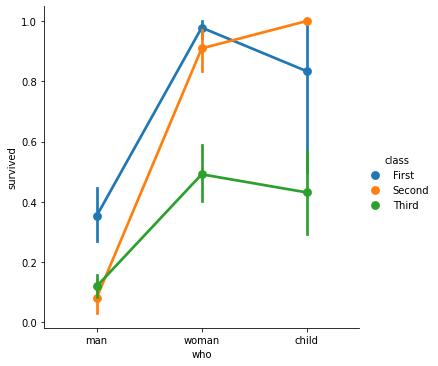

In [ ]:
sns.catplot(x ='who', y='survived', hue='class', kind='point', data=titanic )

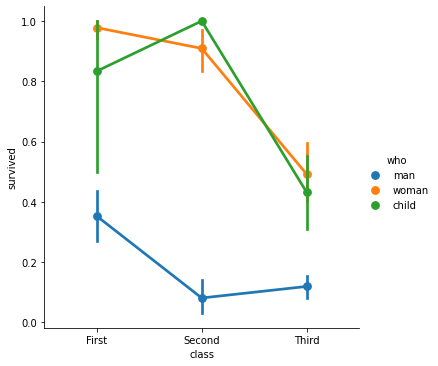

In [ ]:
sns.catplot(x ='class', y='survived', hue='who', kind='point', data=titanic )

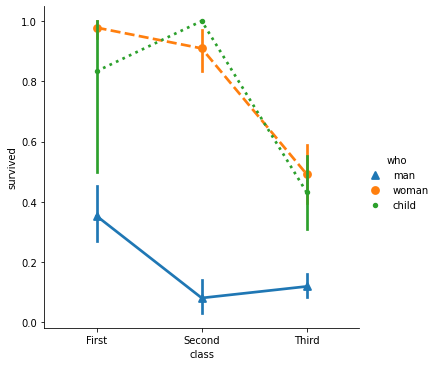

In [ ]:
sns.catplot(x ='class', y='survived', hue='who', kind='point', 
            pallette = {'man':'b', 'woman':'red', 'child':'g'},
            markers = ['^', 'o', '.'], linestyles=['-', '--', ':'],
            data=titanic)

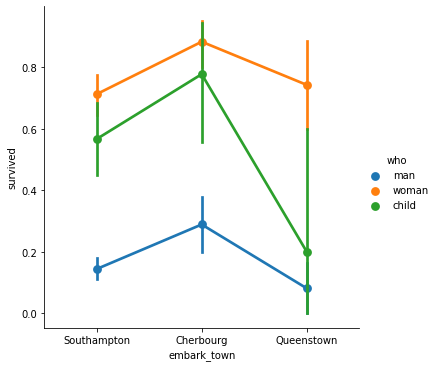

In [ ]:
sns.catplot(x='embark_town', y='survived', data=titanic,
            hue='who', kind='point')

#### Count plots

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


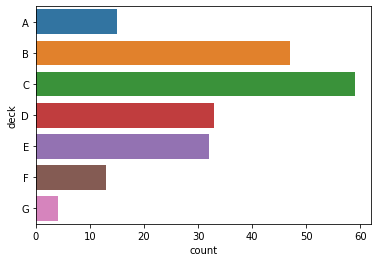

In [ ]:
sns.countplot(y='deck', data=titanic)

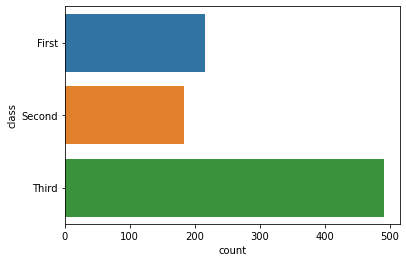

In [ ]:
sns.countplot(y='class', data=titanic)

### 분포시각화(Distribution Visualization)

#### 일변량 분포(Univariate Distributions)

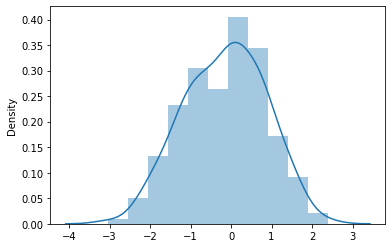

In [ ]:
x = np.random.randn(200)
sns.distplot(x)

###### 히스토그램

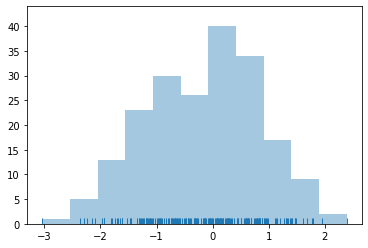

In [ ]:
sns.distplot(x, kde=False, rug=True)

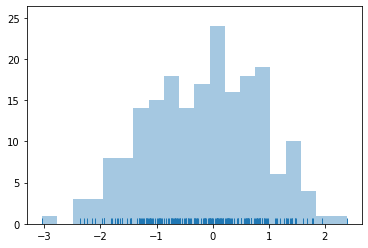

In [ ]:
sns.distplot(x, kde=False, rug=True, bins=20)

###### Kernel Density Estimation(커널밀도추정)

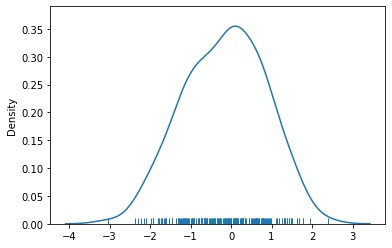

In [ ]:
sns.distplot(x, hist=False, rug=True)

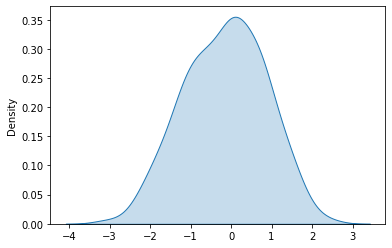

In [ ]:
sns.kdeplot(x, shade=True)

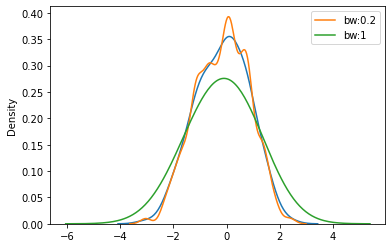

In [ ]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw:0.2')
sns.kdeplot(x, bw=1, label='bw:1')
plt.legend()

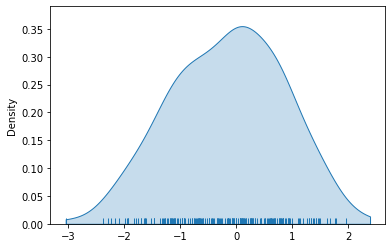

In [ ]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

In [ ]:
x = np.random.gamma(10, size=500)

In [ ]:
from scipy import stats

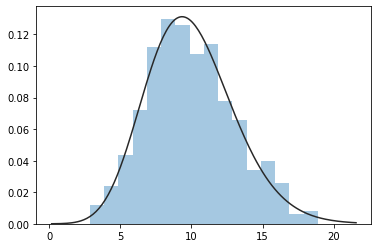

In [ ]:
sns.distplot(x, kde=False, fit=stats.gamma);

#### 이변량 분포(Bivariate Distributions)

In [ ]:
mean = [0,1]
cov = [[1,.3], [.3, 1]]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])
df

,x,y
0,-0.997151,-1.267144
1,-0.573090,0.928710
2,1.274010,2.084101
3,1.260963,0.536611
4,-1.369539,0.085017
...,...,...
195,1.413281,3.594536
196,0.222232,0.184783
197,0.347474,1.604309
198,0.874003,0.854446


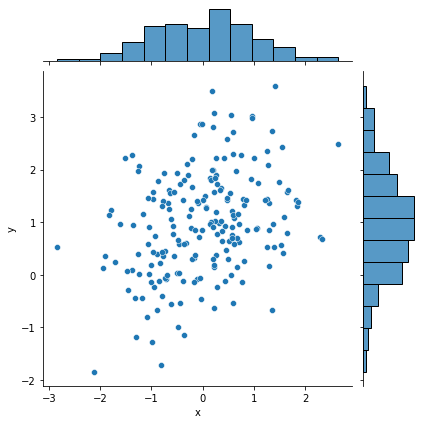

In [ ]:
sns.jointplot('x', 'y', data=df)

###### 육각빈(Hexbin plots)

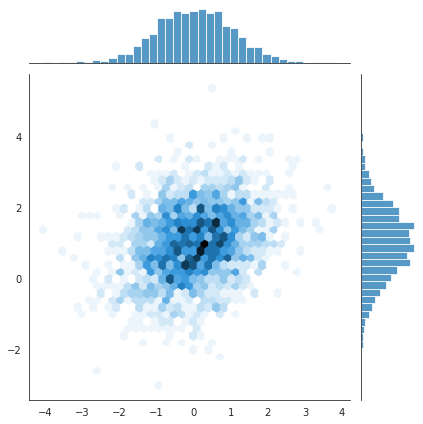

In [ ]:
x, y = np.random.multivariate_normal(mean, cov, 2000).T
with sns.axes_style('white'):
    sns.jointplot(x, y, kind='hex')

###### 커널밀도(Kernel density estimation)

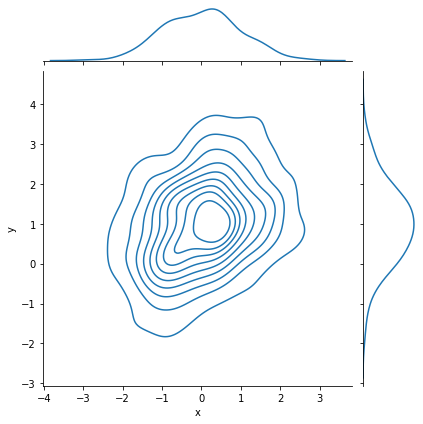

In [ ]:
sns.jointplot(x='x', y='y', data=df, kind='kde',)

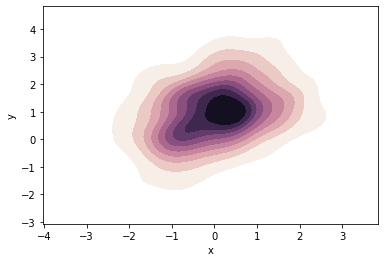

In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(df['x'], df['y'], cmap=cmap, n_level=60, shade=True)

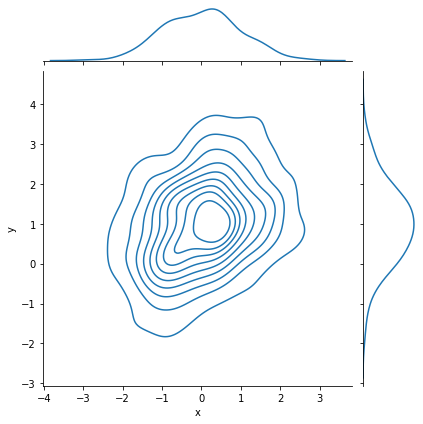

In [ ]:
g = sns.jointplot(x= 'x', y='y', data=df,kind='kde')

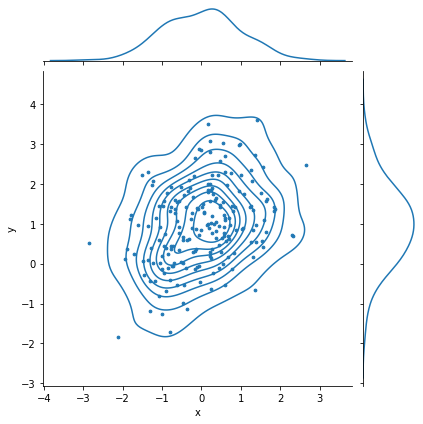

In [ ]:
g = sns.jointplot(x= 'x', y='y', data=df,kind='kde')
g.plot_joint(plt.scatter, s=30, linewidth=1, marker='.')
# g.ax_joint.collections[0].set_alpha(0)

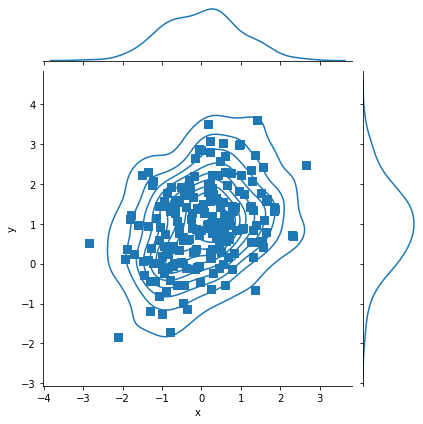

In [ ]:
g = sns.jointplot(x= 'x', y='y', data=df,kind='kde')
g.plot_joint(plt.scatter, s=50, linewidth=1, marker=',')
g.ax_joint.collections[0].set_alpha(1)

#### 페어와이즈 관계 시각화(Visualizing pairwise relationships)

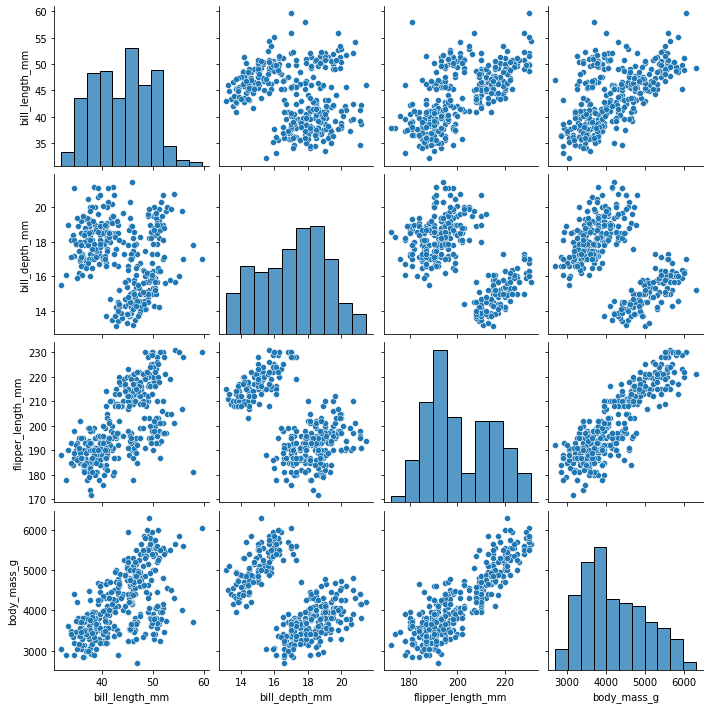

In [ ]:
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins)

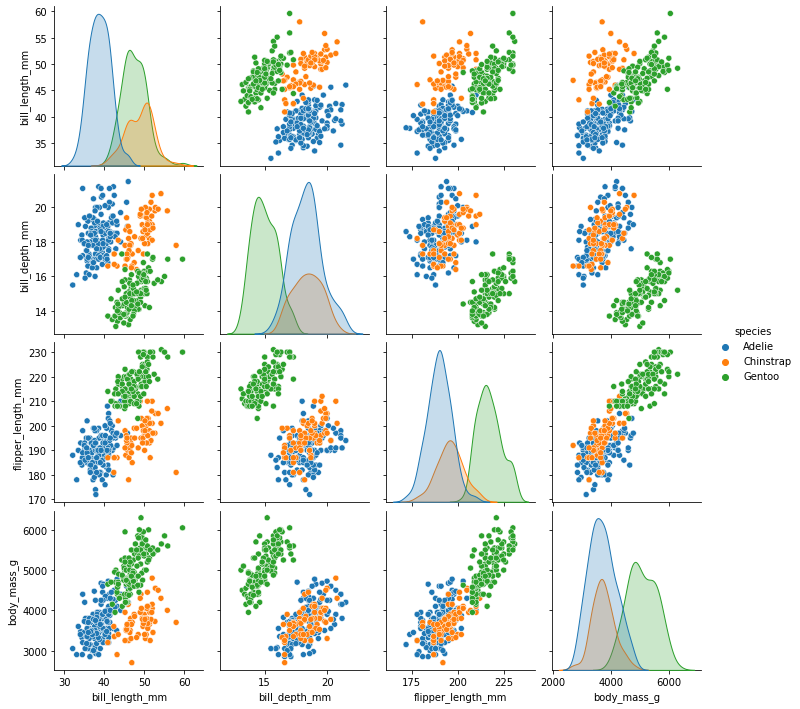

In [ ]:
sns.pairplot(penguins, hue='species' )

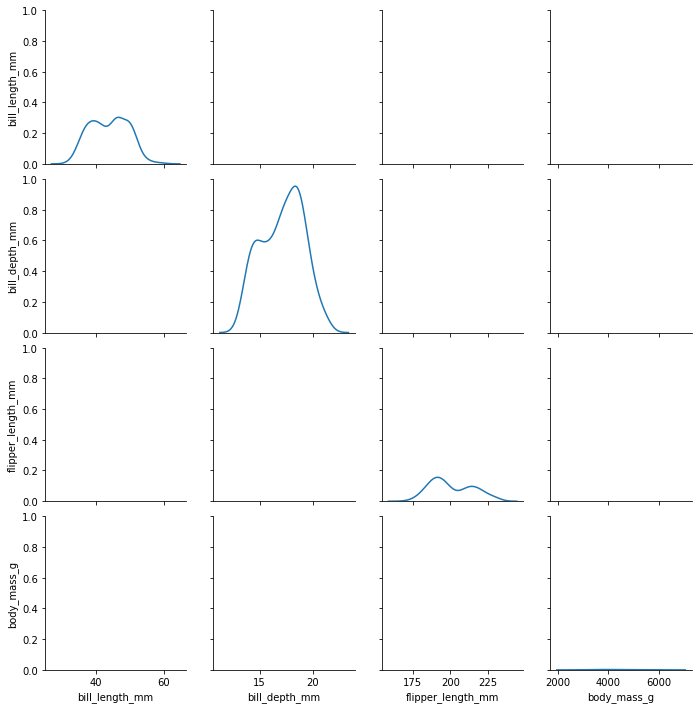

In [ ]:
#pairplots을 manual로 그리는 방법
g =sns.PairGrid(penguins)
g.map_diag(sns.kdeplot)

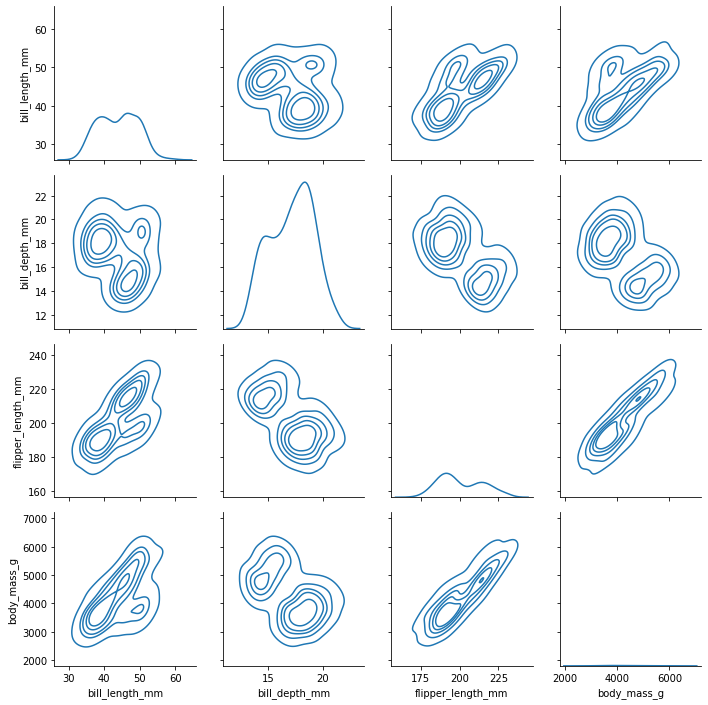

In [ ]:
g =sns.PairGrid(penguins)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

#### 히트맵(Heat Map) & 클러스터맵(Cluster Map)

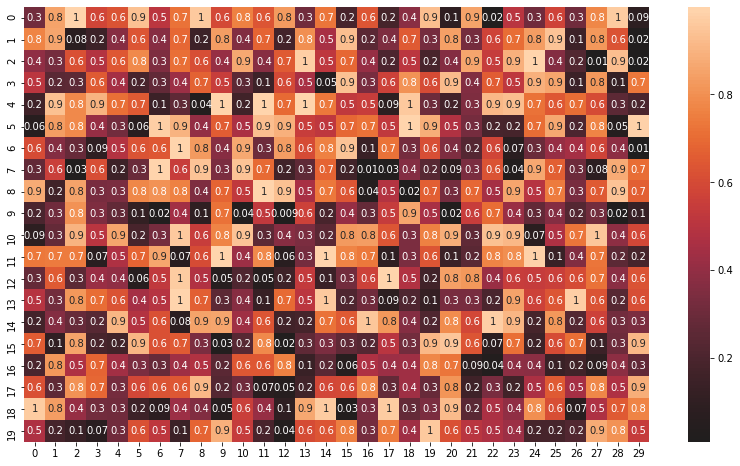

In [ ]:
plt.figure(figsize=(14,8))
udata = np.random.rand(20,30)
sns.heatmap(udata, fmt='.1g', annot=True, center=0)

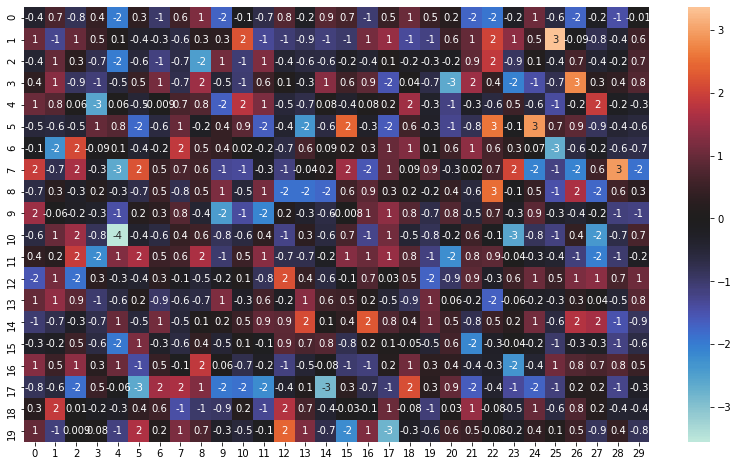

In [ ]:
plt.figure(figsize=(14,8))
udata = np.random.randn(20,30) 
sns.heatmap(udata, fmt='.1g', annot=True, center=0) 

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
#pivot
flights = flights.pivot('month', 'year', 'passengers') # 행 / 열 / 값(value)


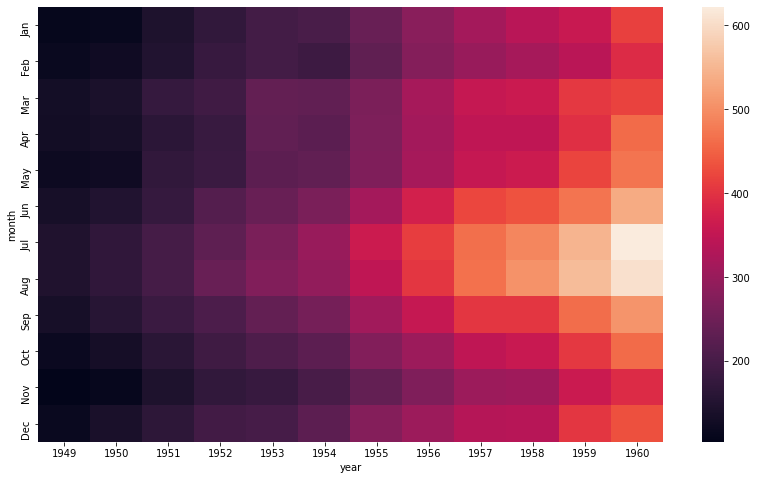

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(flights)

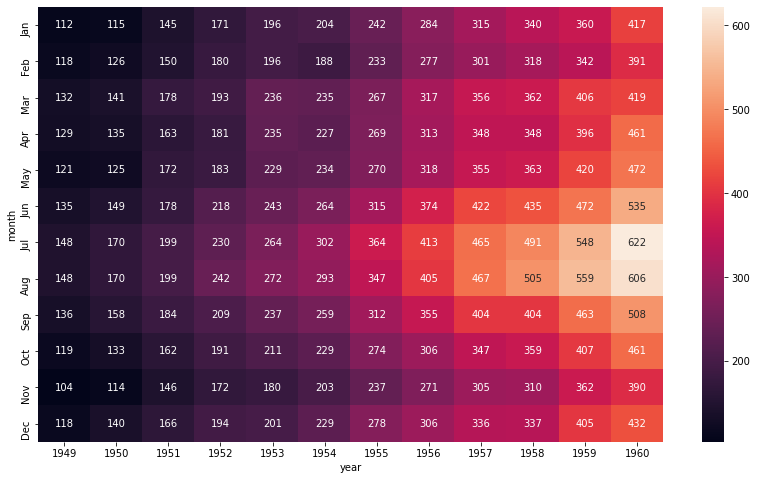

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(flights, annot=True, fmt='d')

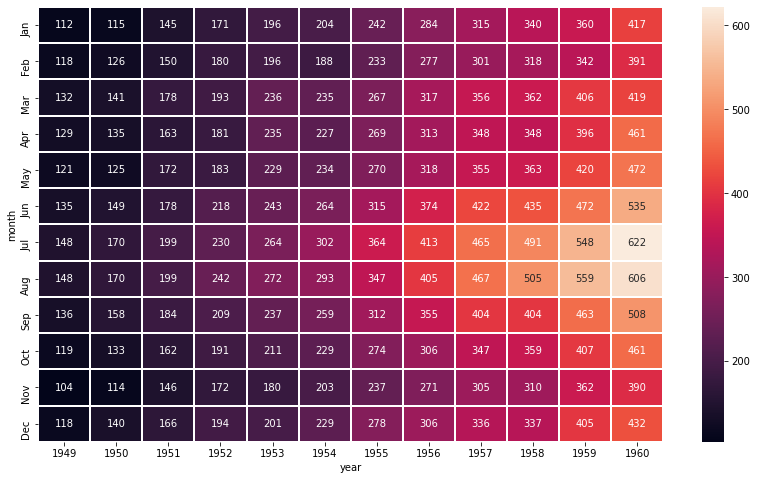

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(flights, annot=True, fmt='d', linewidths=1)

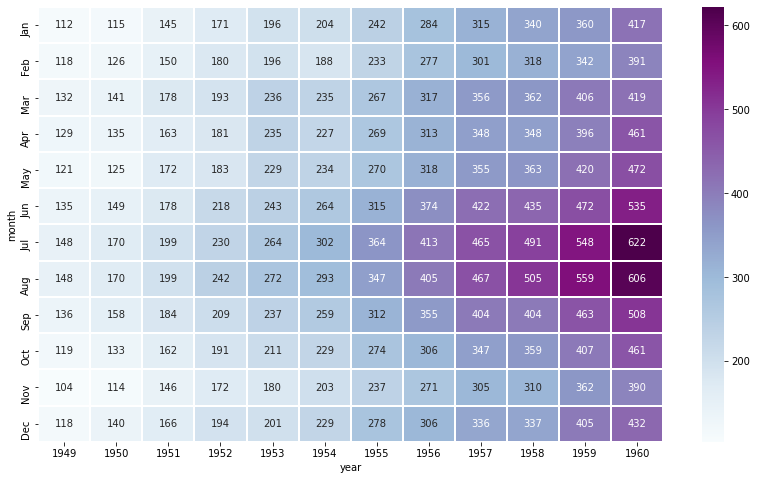

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(flights, annot=True, fmt='d', linewidths=1, cmap='BuPu')

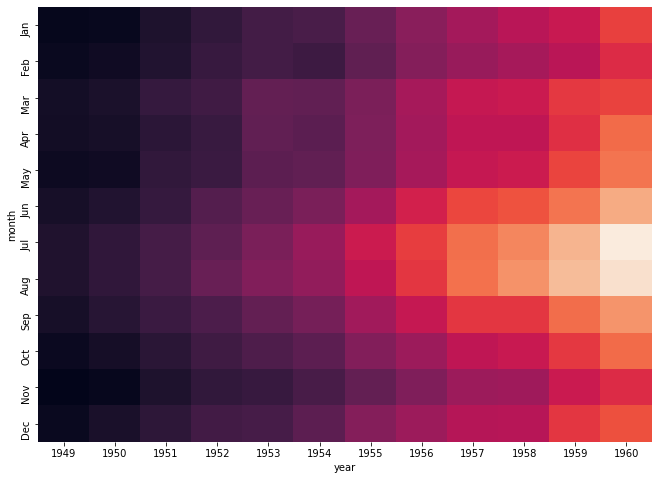

In [ ]:
plt.figure(figsize=(11,8))
sns.heatmap(flights, cbar=False)

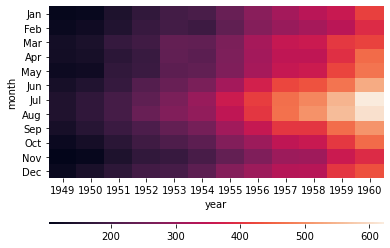

In [ ]:
#우측 비교 바를 아래로 위치 
grid_kws = {'height_ratios':(.9, 0.01), 'hspace':.5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

ax = sns.heatmap(flights, ax=ax, 
                 cbar_ax=cbar_ax,
                 cbar_kws = {'orientation':'horizontal'})

In [ ]:
#클러스터

brain_networks = sns.load_dataset('brain_networks')

In [ ]:
brain_networks.tail()

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,6,6.1,6.2,6.3,7,7.1,7.2,7.3,7.4,7.5,8,8.1,8.2,8.3,8.4,8.5,9,9.1,10,10.1,11,11.1,12,12.1,12.2,12.3,12.4,13,13.1,13.2,13.3,13.4,13.5,14,14.1,15,15.1,16,16.1,16.2,16.3,16.4,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
918,915,-7.4295125007629395,-4.81321907043457,-3.670536518096924,1.4422610998153689,-19.6804313659668,-29.109355926513672,-3.3765623569488525,-8.764892578125,0.017911728471517563,-25.30509376525879,-75.4611587524414,-70.28926086425781,-13.11902904510498,-5.194375514984131,-56.02226257324219,-24.290605545043945,-3.0142242908477783,-21.04401969909668,-32.49642562866211,-77.58338928222656,-38.715728759765625,-61.31478500366211,-58.12326049804688,-61.26280975341797,-21.29709815979004,-20.013139724731445,14.63028335571289,37.42593383789063,30.894546508789066,25.88479995727539,-7.419687747955322,-23.84523582458496,-14.376977920532227,51.68816757202149,-61.51387405395508,-15.412579536437988,-53.038917541503906,-12.09190273284912,2.03261137008667,4.224202632904054,-19.436220169067386,15.89472198486328,22.195951461791992,87.96731567382812,11.944791793823242,-15.589627265930176,110.51963806152344,32.089752197265625,15.05442714691162,32.00112152099609,56.16196823120117,32.387340545654304,58.28579330444336,68.55741119384766,22.83304786682129,76.17948913574219,51.9346694946289,-6.614512920379639,-6.690762042999268,22.893030166625977,48.27437973022461,76.22845458984375
919,916,-33.55413818359375,-38.60562133789063,-25.66480255126953,-30.252351760864254,5.5627851486206055,20.182186126708984,17.91124725341797,24.65358161926269,-32.93561172485352,-21.783203125,-16.198238372802734,-34.89377975463867,16.504655838012695,13.005378723144533,26.23078536987305,4.7642107009887695,5.956122875213622,-0.28763681650161743,-55.81973266601562,-69.36992645263672,-41.05872344970703,-24.580402374267575,58.48075485229492,38.05572509765625,-14.08375358581543,-0.2307861596345901,0.818935215473175,-7.2068257331848145,10.062933921813963,3.1475517749786377,4.52175235748291,-40.07661819458008,-14.810827255249025,-25.87371635437012,-33.01375961303711,-5.711860656738281,-6.41852331161499,0.2689480781555176,12.39964485168457,18.401351928710934,16.711153030395508,17.339653015136722,13.682953834533693,41.51439666748047,-5.460529804229736,45.7501106262207,23.94855117797852,-6.062110900878906,8.874655723571777,41.39191818237305,54.62644958496094,19.221269607543945,59.86481857299805,23.00457763671875,7.6574625968933105,50.96239852905274,13.696922302246096,63.50361633300781,57.40117645263672,24.97454833984375,51.97215270996094,64.53878784179689
920,917,-78.53956604003906,-74.19718933105469,-54.04159545898438,-39.97029113769531,-14.277058601379395,-30.606460571289066,60.62852096557617,62.02702331542969,-32.80055618286133,-37.02149963378906,2.0989413261413574,-18.581594467163086,11.386636734008787,3.6762948036193848,52.87111282348633,-3.9700963497161865,27.240922927856445,29.14019775390625,23.64734649658203,-51.68385314941406,-42.64901351928711,-51.41702651977539,32.086292266845696,8.108551025390625,0.4911323487758637,0.7133932113647461,25.964569091796875,12.467845916748047,44.40826034545898,22.581989288330078,16.52739143371582,-5.300595283508301,-20.7695426940918,-21.794662475585934,-6.789887428283691,24.036725997924805,-16.270994186401367,31.94295310974121,16.112009048461914,56.00326156616211,45.26115036010742,37.00738906860352,29.75330352783203,26.61463737487793,22.20086479187012,-27.784894943237305,29.01400756835937,11.967190742492676,25.611602783203125,35.4789924621582,33.521270751953125,63.09746551513672,68.76786804199219,49.66401672363281,64.55149841308594,43.80074691772461,8.144479751586914,47.28145980834961,70.49964904785156,66.99440002441406,81.53924560546875,64.96977233886719
921,918,-103.23582458496094,-98.7442855834961,-40.10954284667969,-44.90773391723633,12.109148025512695,1.6213401556015017,33.765560150146484,55.35607147216797,-14.330512046813965,-17.224781036376953,-3.0074541568756104,-42.6728401184082,1.5810

In [ ]:
brain_networks = sns.load_dataset('brain_networks', header=[0,1,2], index_col=0) #멀티 헤더
brain_networks

network           1                     2  ...         17                       
node              1                     1  ...          3                      4
hemi             lh         rh         lh  ...         lh          rh         lh
0         56.055744  92.031036   3.391576  ... -10.520872  120.490463 -39.686432
1         55.547253  43.690075 -65.495987  ... -39.607521   24.764011 -36.771008
2         60.997768  63.438793 -51.108582  ...  12.985169  -75.027451   6.434262
3         18.514868  12.657158 -34.576603  ... -15.819172  -37.361431  -4.650954
4         -2.527392 -63.104668 -13.814151  ...   5.453649    5.169828  87.809135
..              ...        ...        ...  ...        ...         ...        ...
915       -7.429513  -4.813219  -3.670537  ...  22.893030   48.274380  76.228455
916      -33.554138 -38.605621 -25.664803  ...  24.974548   51.972153  64.538788
917      -78.539566 -74.197189 -54.041595  ...  66.994400   81.539246  64.969772
918     -103.235825 -98.744286 -40.109543  ...  20.517746    3.124434  56.718388
919      -36.288868 -10.762070 -30.356262  ...   8.300399   33.687531  17.960655

[920 rows x 62 columns]

In [ ]:
networks = brain_networks.columns.get_level_values('network')
used_networks = np.arange(1,18)
used_columns = (networks.astype(int).isin(used_networks))
brain_networks = brain_networks.loc[:, used_columns]

network_pal = sns.husl_palette(17, s=.5)
network_lut = dict(zip(map(str, used_networks), network_pal))
network_colors = pd.Series(networks, index=brain_networks.columns).map(network_lut)

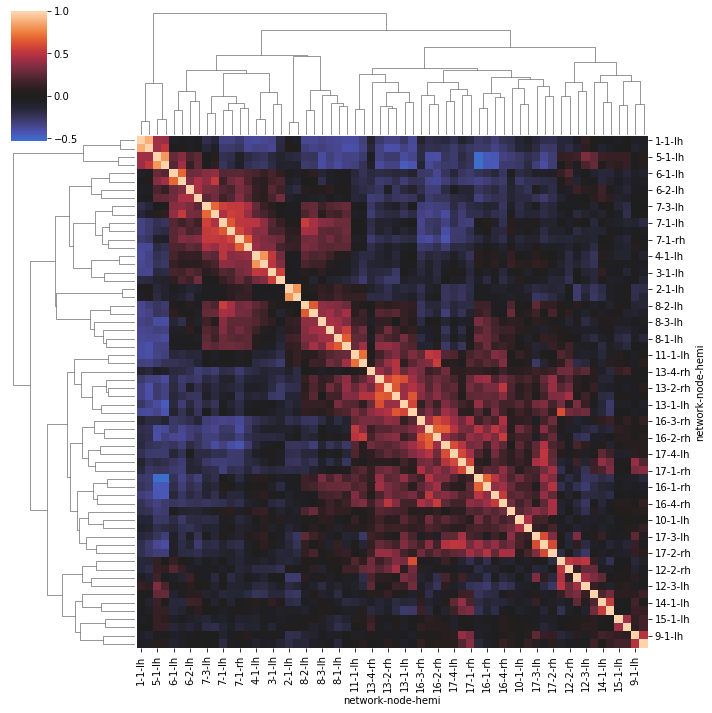

In [ ]:
sns.clustermap(brain_networks.corr(), center=0)

### 선형 관계 시각화(visualizing linear relationships)

https://www.youtube.com/watch?v=gWhwAY5Q9Ec
1시간 36분 위치쯤

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


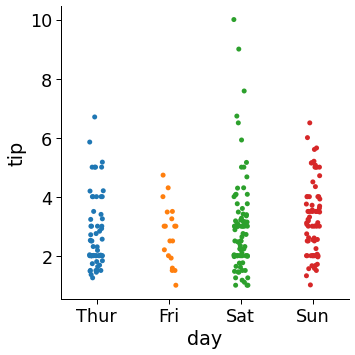

In [ ]:
sns.set_context('paper', font_scale=2) # seaborn xlabel, xticks, ylabel, yticks등 사이즈 
sns.catplot(x = 'day', y='tip', data=tips)